In [1]:
import scanpy as sc

In [11]:
import pandas as pd

In [2]:
fetal_total = sc.read_h5ad("/mnt/c/Bioinf/HUMAN_FETAL_RETINA/COMBINED_EKPB_v1_clean_RNA_indexed.h5ad")

In [3]:
fetal_total

AnnData object with n_obs × n_vars = 113073 × 36144
    obs: 'nCount_RNA', 'nFeature_RNA', 'Retina_Cells', 'percent.rb', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'origin', 'timepoint', 'EK_PB_annov1'
    var: 'features'
    obsm: 'X_tsne', 'X_umap'

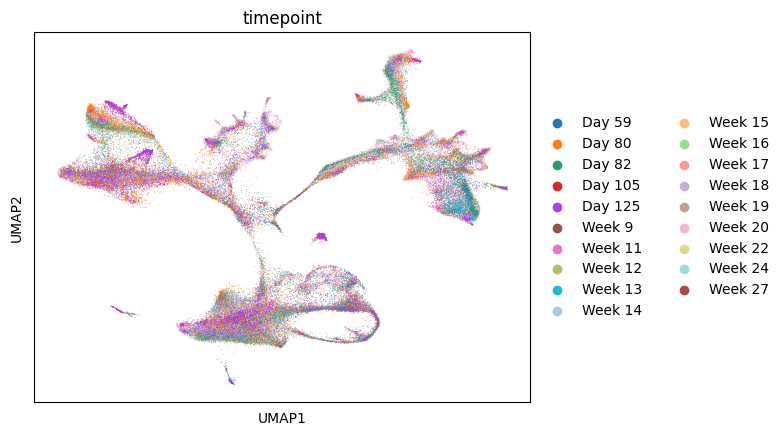

In [6]:
sc.pl.umap(fetal_total, color = 'timepoint')

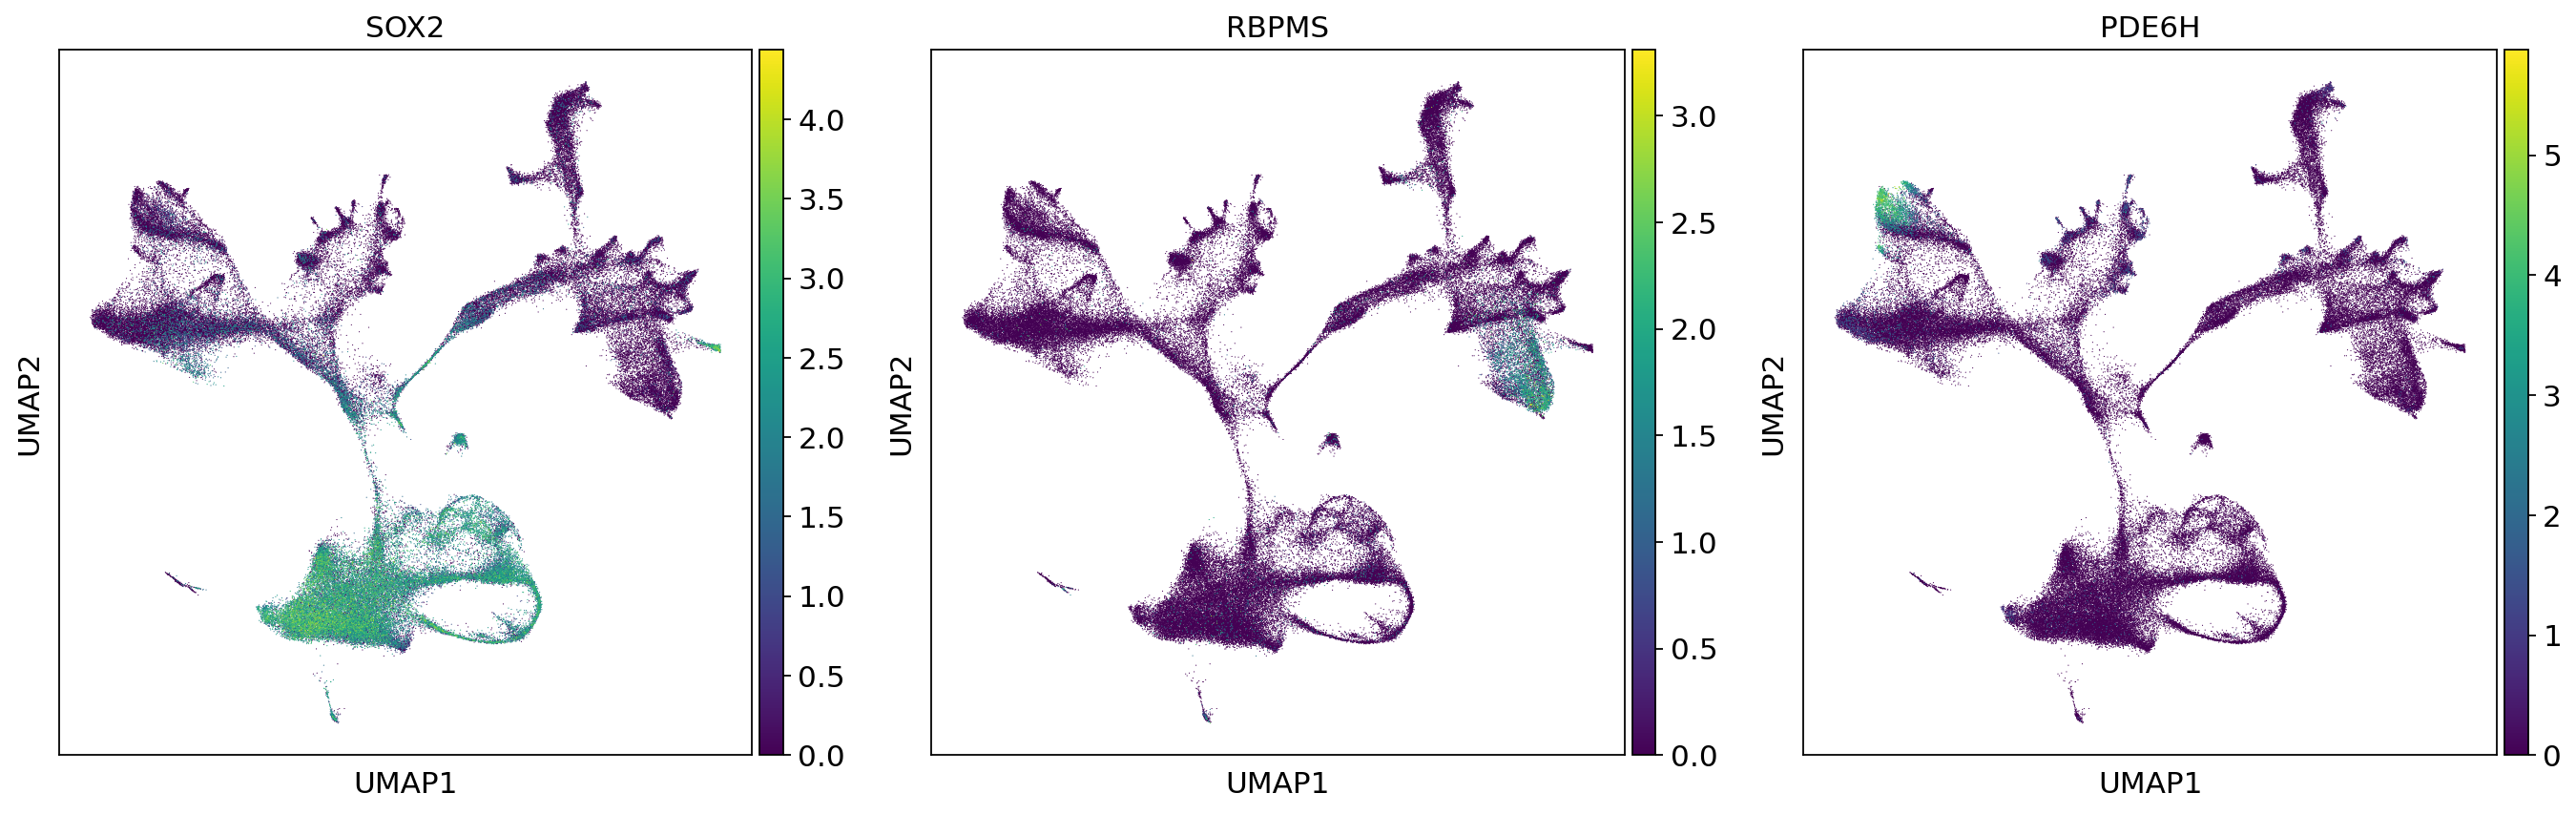

In [9]:
sc.set_figure_params(figsize = [6,6])
sc.pl.umap(fetal_total, color = ['SOX2','RBPMS','PDE6H'], use_raw = False)

In [16]:
fetal_total.obs['EK_PB_annov1'] = fetal_total.obs['EK_PB_annov1'].astype(str)

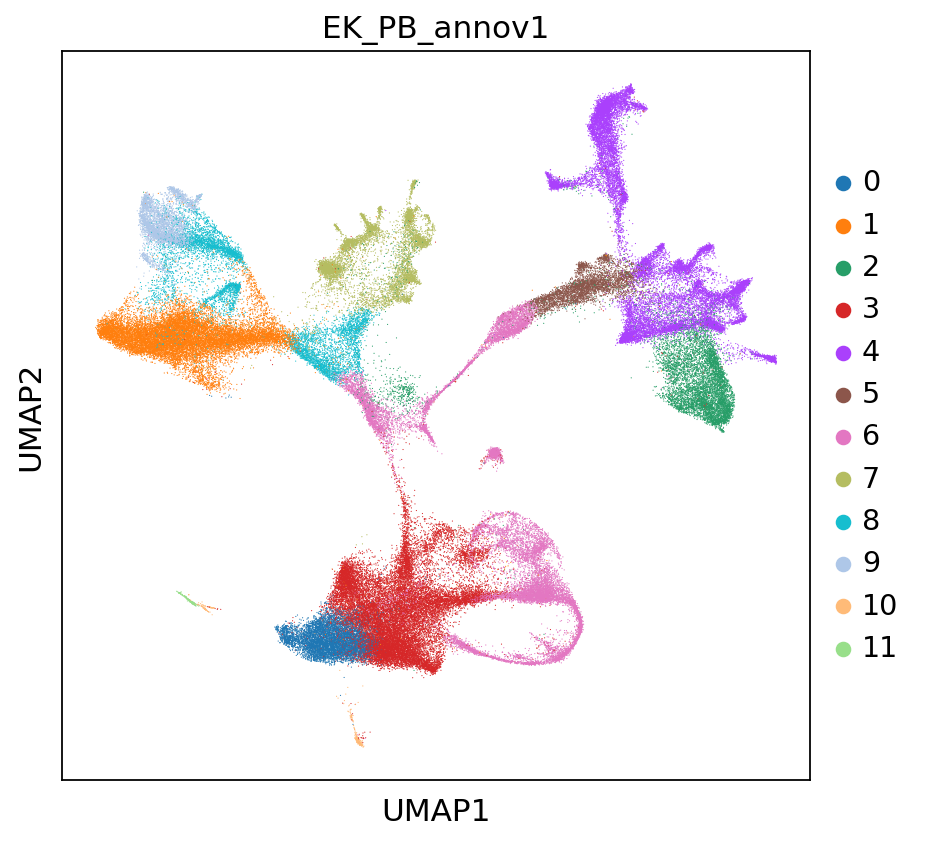

In [17]:
sc.pl.umap(fetal_total, color='EK_PB_annov1')

In [14]:
fetal_total.obs

,nCount_RNA,nFeature_RNA,Retina_Cells,percent.rb,percent.mt,S.Score,G2M.Score,Phase,origin,timepoint,EK_PB_annov1
Hgw11.AAACCTGAGACAATAC.1_1,7630.0,2760,1,15.648755,1.061599,-0.625942,-0.812992,G1,Lu,Week 11,2
Hgw11.AAACCTGAGACGCTTT.1_1,1966.0,1011,1,21.566633,1.881994,-0.135045,-0.205367,G1,Lu,Week 11,2
Hgw11.AAACCTGAGCGTCTAT.1_1,3729.0,1469,1,33.118799,3.378922,0.074858,-0.185090,S,Lu,Week 11,3
Hgw11.AAACCTGAGTTGAGTA.1_1,2348.0,1309,1,9.582624,5.408859,-0.169082,-0.265821,G1,Lu,Week 11,2
Hgw11.AAACCTGCAAGTAATG.1_1,3732.0,1700,1,30.305466,1.125402,-0.075609,-0.339944,G1,Lu,Week 11,3
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTTATTCTC-1_23,6715.0,2715,2,16.798213,2.874162,0.255948,-0.487672,S,Thomas Reh Lab,Day 125,6
TTTGGTTTCCATTCAT-1_23,5706.0,2399,2,15.054329,4.433929,0.443079,-0.237750,S,Thomas Reh Lab,Day 125,3
TTTGTTGAGCATCGAG-1_23,12042.0,3342,2,19.282511,9.890384,-0.552566,-0.525181,G1,Thomas Reh Lab,Day 125,9
TTTGTTGCAAATACGA-1_23,7824.0,2868,2,12.154908,6.786810,-0.120949,1.409193,G2M,Thomas Reh Lab,Day 125,6


In [18]:
old_to_new = {
'0':'Muller glia',
'1':'Rods',
'2':'Retinal ganglion cells',
'3':'Late (glial) retinal progenitors',
'4':'Amacrine cells',
'5':'Horizontal cells',
'6':'Retinal progenitors',
'7':'Bipolar cells',
'8':'Cone precursors',
'9':'Cones',
'10':'Astrocytes',
'11':'Microglia'}
fetal_total.obs['EK_PB_annov1'] = (
fetal_total.obs['EK_PB_annov1']
.map(old_to_new).astype('category')
)

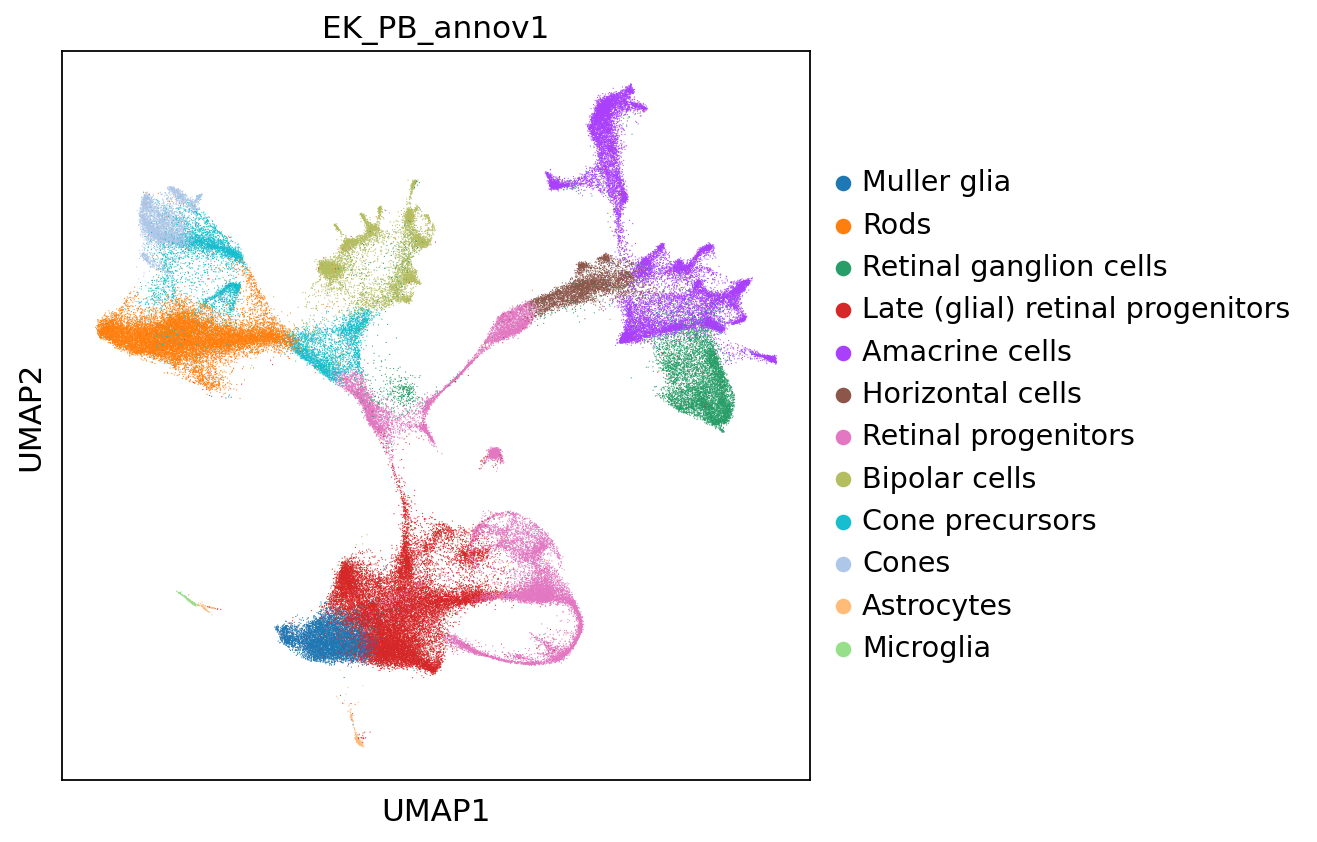

In [19]:
sc.pl.umap(fetal_total, color='EK_PB_annov1')

In [20]:
fetal_total

AnnData object with n_obs × n_vars = 113073 × 36144
    obs: 'nCount_RNA', 'nFeature_RNA', 'Retina_Cells', 'percent.rb', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'origin', 'timepoint', 'EK_PB_annov1'
    var: 'features'
    uns: 'timepoint_colors', 'EK_PB_annov1_colors'
    obsm: 'X_tsne', 'X_umap'

In [21]:
fetal_total.X

<113073x36144 sparse matrix of type '<class 'numpy.float64'>'
	with 162148567 stored elements in Compressed Sparse Row format>

In [22]:
fetal_total.raw.X

<113073x36144 sparse matrix of type '<class 'numpy.float64'>'
	with 162148567 stored elements in Compressed Sparse Row format>

In [26]:
fetal_total.obs['organism_ontology_term_id'] = 'NCBITaxon:9606'

In [28]:
dev_stage = {
    'Day 59' : 'HsapDv:0000045',
    'Day 80' : 'HsapDv:0000048',
    'Day 82' : 'HsapDv:0000048',
    'Day 105' : 'HsapDv:0000052',
    'Day 125' : 'HsapDv:0000054',
    'Week 9' : 'HsapDv:0000046',
    'Week 10' : 'HsapDv:0000047',
    'Week 11' : 'HsapDv:0000048',
    'Week 12' : 'HsapDv:0000049',
    'Week 13' : 'HsapDv:0000050',
    'Week 14' : 'HsapDv:0000051',
    'Week 15' : 'HsapDv:0000052',
    'Week 16' : 'HsapDv:0000053',
    'Week 17' : 'HsapDv:0000054',
    'Week 18' : 'HsapDv:0000055',
    'Week 19' : 'HsapDv:0000056',
    'Week 20' : 'HsapDv:0000057',
    'Week 22' : 'HsapDv:0000059',
    'Week 24' : 'HsapDv:0000061',
    'Week 27' : 'HsapDv:0000064'
    }
fetal_total.obs['development_stage_ontology_term_id']  = (
fetal_total.obs['timepoint']
.map(dev_stage).astype('category')
)

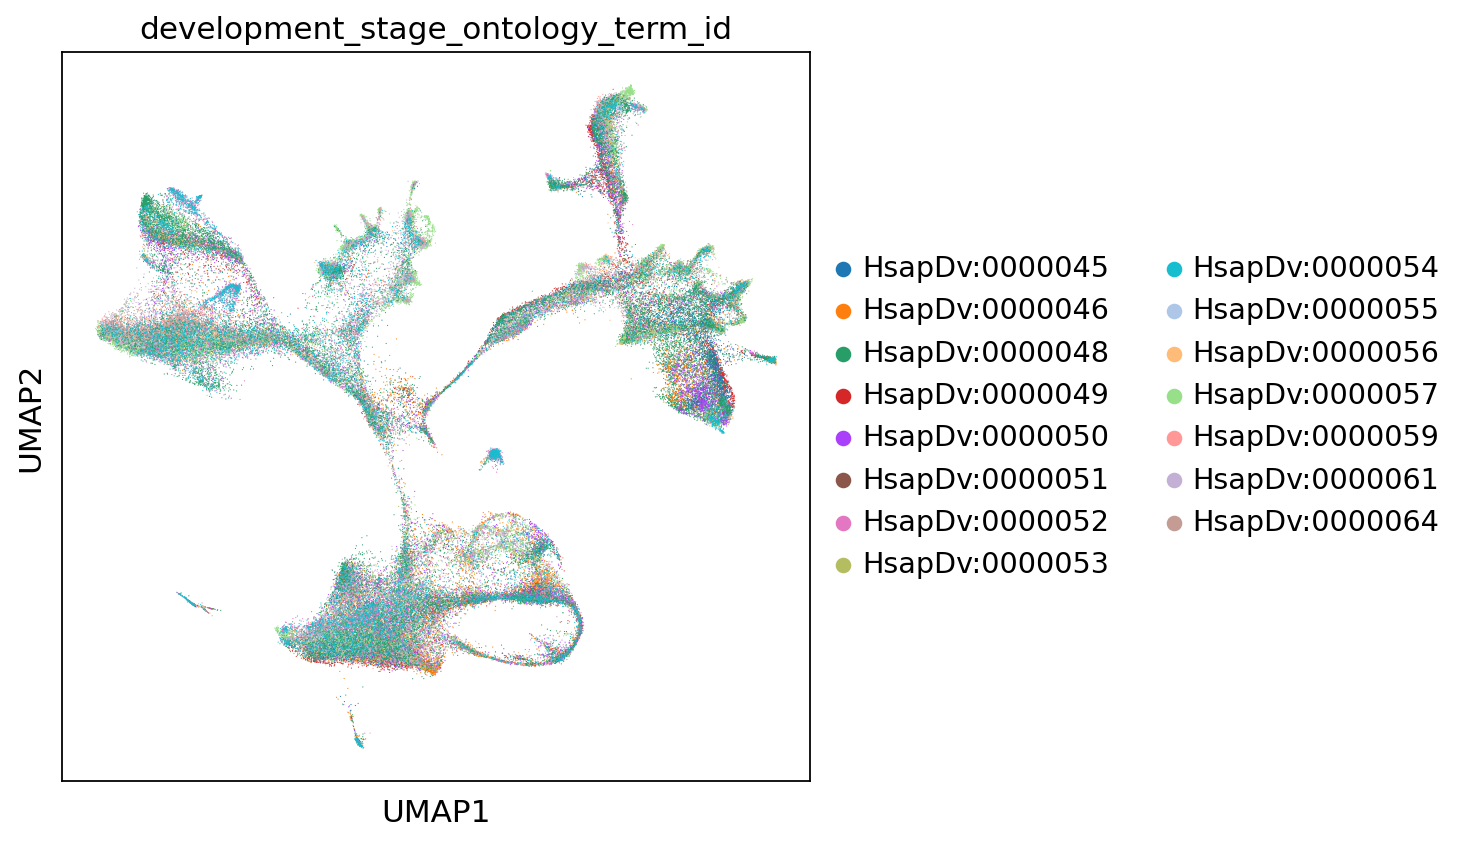

In [29]:
sc.pl.umap(fetal_total, color='development_stage_ontology_term_id')

In [30]:
fetal_total.obs['sex_ontology_term_id'] = 'unknown'

In [31]:
fetal_total.obs['self_reported_ethnicity_ontology_term_id'] = 'unknown'

In [32]:
fetal_total.obs['disease_ontology_term_id'] = 'PATO:0000461'

In [33]:
fetal_total.obs['tissue_type'] = 'tissue'

In [34]:
fetal_total.obs['tissue_ontology_term_id'] = 'UBERON:0000966'

In [35]:
old_to_new = {
'Muller glia':'CL:0000636',
'Rods':'CL:0000604',
'Retinal ganglion cells':'CL:0000740',
'Late (glial) retinal progenitors':'CL:0002672',
'Amacrine cells':'CL:0000561',
'Horizontal cells':'CL:0000745',
'Retinal progenitors':'CL:0002672',
'Bipolar cells':'CL:0000745',
'Cone precursors':'CL:0002672',
'Cones':'CL:0000573',
'Astrocytes':'CL:4033015',
'Microglia':'CL:0000129'}
fetal_total.obs['cell_type_ontology_term_id'] = (
fetal_total.obs['EK_PB_annov1']
.map(old_to_new).astype('category')
)

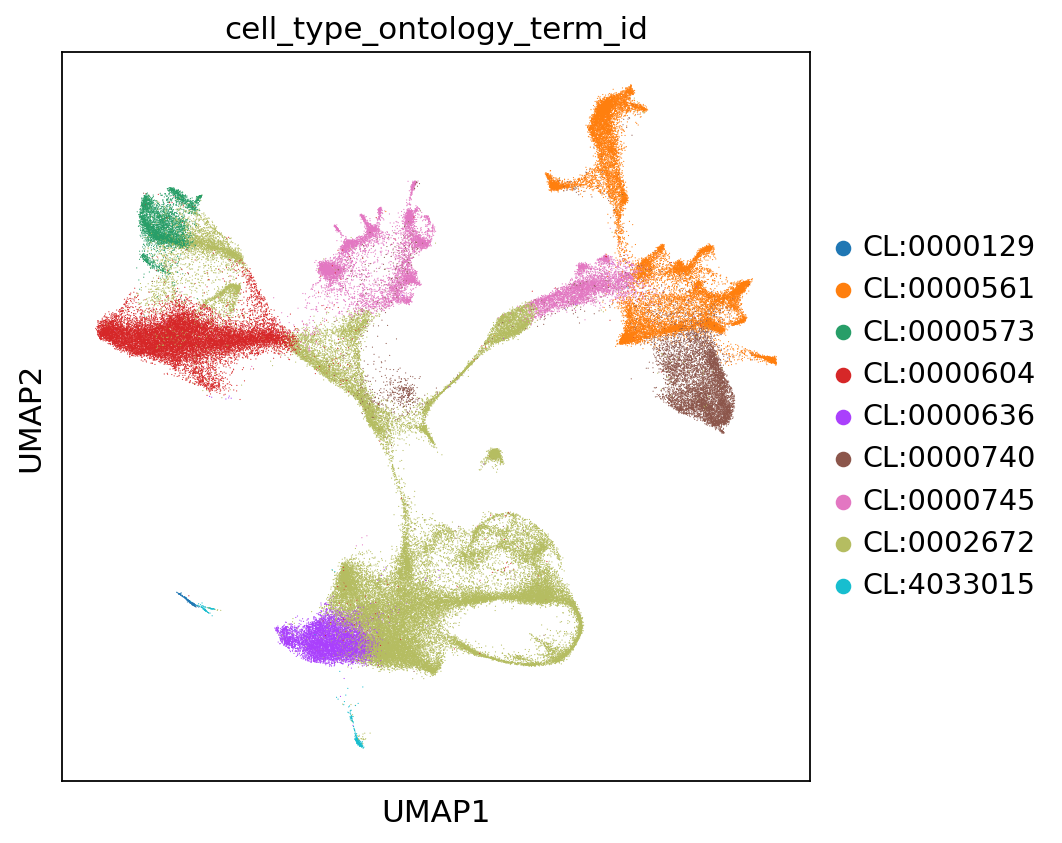

In [36]:
sc.pl.umap(fetal_total, color='cell_type_ontology_term_id')

In [37]:
fetal_total.obs

,nCount_RNA,nFeature_RNA,Retina_Cells,percent.rb,percent.mt,S.Score,G2M.Score,Phase,origin,timepoint,EK_PB_annov1,organism_ontology_term_id,development_stage_ontology_term_id,sex_ontology_term_id,self_reported_ethnicity_ontology_term_id,disease_ontology_term_id,tissue_type,tissue_ontology_term_id,cell_type_ontology_term_id
Hgw11.AAACCTGAGACAATAC.1_1,7630.0,2760,1,15.648755,1.061599,-0.625942,-0.812992,G1,Lu,Week 11,Retinal ganglion cells,NCBITaxon:9606,HsapDv:0000048,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0000740
Hgw11.AAACCTGAGACGCTTT.1_1,1966.0,1011,1,21.566633,1.881994,-0.135045,-0.205367,G1,Lu,Week 11,Retinal ganglion cells,NCBITaxon:9606,HsapDv:0000048,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0000740
Hgw11.AAACCTGAGCGTCTAT.1_1,3729.0,1469,1,33.118799,3.378922,0.074858,-0.185090,S,Lu,Week 11,Late (glial) retinal progenitors,NCBITaxon:9606,HsapDv:0000048,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0002672
Hgw11.AAACCTGAGTTGAGTA.1_1,2348.0,1309,1,9.582624,5.408859,-0.169082,-0.265821,G1,Lu,Week 11,Retinal ganglion cells,NCBITaxon:9606,HsapDv:0000048,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0000740
Hgw11.AAACCTGCAAGTAATG.1_1,3732.0,1700,1,30.305466,1.125402,-0.075609,-0.339944,G1,Lu,Week 11,Late (glial) retinal progenitors,NCBITaxon:9606,HsapDv:0000048,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0002672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTTATTCTC-1_23,6715.0,2715,2,16.798213,2.874162,0.255948,-0.487672,S,Thomas Reh Lab,Day 125,Retinal progenitors,NCBITaxon:9606,HsapDv:0000054,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0002672
TTTGGTTTCCATTCAT-1_23,5706.0,2399,2,15.054329,4.433929,0.443079,-0.237750,S,Thomas Reh Lab,Day 125,Late (glial) retinal progenitors,NCBITaxon:9606,HsapDv:0000054,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0002672
TTTGTTGAGCATCGAG-1_23,12042.0,3342,2,19.282511,9.890384,-0.552566,-0.525181,G1,Thomas Reh Lab,Day 125,Cones,NCBITaxon:9606,HsapDv:0000054,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0000573
TTTGTTGCAAATACGA-1_23,7824.0,2868,2,12.154908,6.786810,-0.120949,1.409193,G2M,Thomas Reh Lab,Day 125,Retinal progenitors,NCBITaxon:9606,HsapDv:0000054,unknown,unknown,PATO:0000461,tissue,UBERON:0000966,CL:0002672


In [38]:
old_to_new = {
'Thomas Reh Lab':'EFO:0009901',
'Lu':'EFO:0009899'}
fetal_total.obs['assay_ontology_term_id'] = (
fetal_total.obs['origin']
.map(old_to_new).astype('category')
)

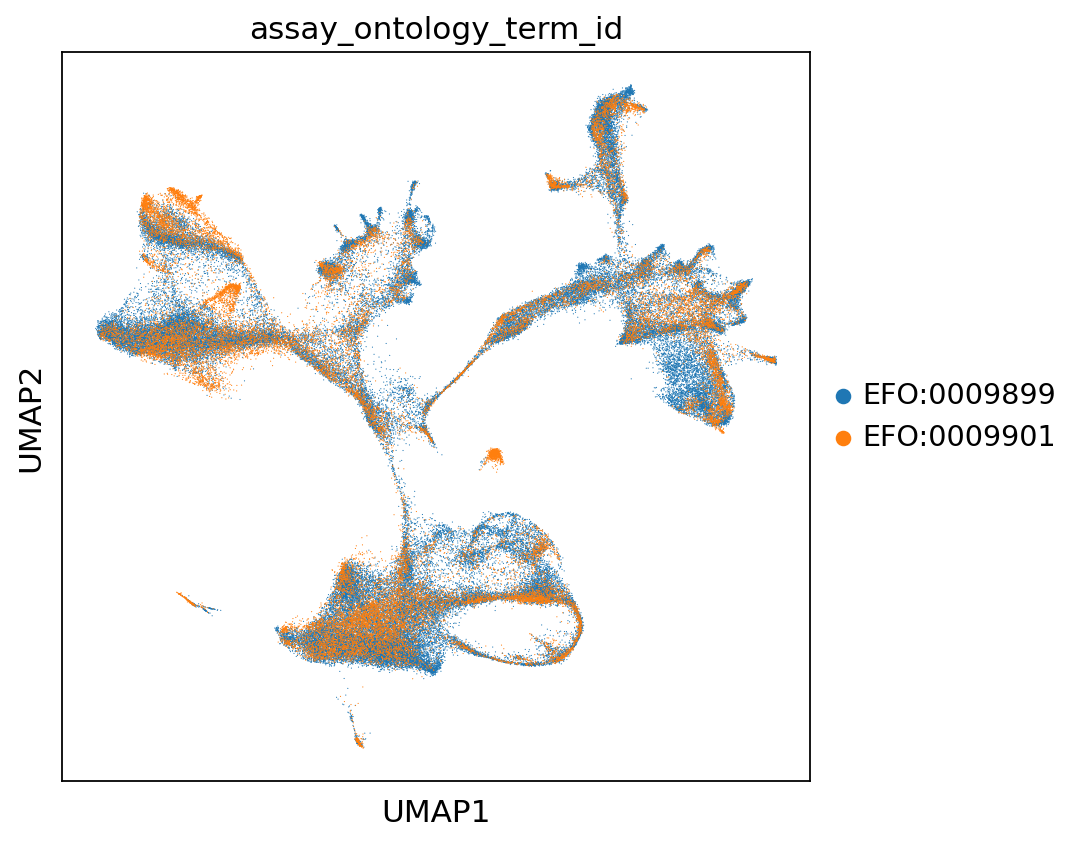

In [39]:
sc.pl.umap(fetal_total, color='assay_ontology_term_id')

In [40]:
fetal_total.obs['suspension_type'] = 'cell'

In [41]:
old_to_new = {
'Thomas Reh Lab':'GSE142526',
'Lu':'GSE116106, GSE116106'}
fetal_total.obs['GSE'] = (
fetal_total.obs['origin']
.map(old_to_new).astype('category')
)

In [42]:
old_to_new = {
'Thomas Reh Lab':'10.1016/j.celrep.2020.01.007',
'Lu':'j.devcel.2020.04.009'}
fetal_total.obs['doi'] = (
fetal_total.obs['origin']
.map(old_to_new).astype('category')
)

In [43]:
fetal_total.write_h5ad('/mnt/c/Bioinf/HUMAN_FETAL_RETINA/COMBINED_EKPB_v1_clean_RNA_indexed_cellxgenev1.h5ad')